# Machine Learning Model Building for SmallDS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

##### Import file dữ liệu đã được chuẩn hóa cũng như xử lí

In [2]:
import os
file_path = 'Car_Prediction_Splitdata/small/scaled_small_car_used_data_ftloc_with_outliers.csv'
file_name_with_extension = os.path.basename(file_path)
file_name, file_extension = os.path.splitext(file_name_with_extension)

##### Tạo bảng ghi lại độ chính xác của các mô hình

In [3]:
import csv
import math

data = [
    ['RandomForestRegressor', None, None, None, None, None, None],
    ['DecisionTreeRegressor', None, None, None, None, None, None],
    ['XGBRegressor', None, None, None, None, None, None],
    ['GradientBoostingRegressor', None, None, None, None, None, None],
    ['BaggingRegressor', None, None, None, None, None, None]
]

# Tên tiêu đề cột
header = ['Regressor', 'R2_Score','Cross validation score', 'mean_squared_error', 'mean_absolute_error', 'root_mean_squared_error', 'Diff']

file_name = file_name + '_result.csv'

# Tạo và ghi vào file CSV
with open(file_name, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(header)
    writer.writerows(data)

##### Ghi kết quả vào file csv đã tạo

In [4]:
def write_result(name,r2_score_value,scores_value,mean_squared_error,mean_absolute_error,root_mean_squared_error,diff_value):
    data = []
    with open(file_name, 'r') as file:
        reader = csv.reader(file)
        data = list(reader)
    for row in data:
        if row[0] == name:
            row[1] = r2_score_value
            row[2] = scores_value
            row[3] = mean_squared_error
            row[4] = mean_absolute_error
            row[5] = root_mean_squared_error
            row[6] = diff_value

    # Ghi lại dữ liệu đã cập nhật vào file CSV
    with open(file_name, 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(data)

In [5]:
df= pd.read_csv('Car_Prediction_Splitdata/small/scaled_small_car_used_data_ftloc_with_outliers.csv')
df.head()

,power,engine_size,mileage,gearbox,car_age,fuel_type,price (€)
0,-0.166636,0.043305,0.068467,-0.642786,0.170787,-0.034226,24899
1,-0.322096,-0.573084,-0.992051,-0.642786,-1.160317,1.227865,27990
2,-0.425736,-0.553438,-0.832757,1.555728,-0.894096,0.596820,34980
3,-0.425736,-0.433107,1.250639,1.555728,1.768113,0.596820,8890
4,-0.231411,0.008925,-0.570072,-0.642786,-0.095433,-0.875621,20780


In [6]:
X = df.drop(['price (€)'], axis = 1)
Y = df['price (€)']

##### Import các thư viện cần thiết cho việc đánh giá và so sánh mô hình

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor

In [8]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score
from sklearn.model_selection import train_test_split

##### Chia tập dữ liệu Train và Test với tỉ lệ 7:3

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (826, 6)
Training target vector size: (826,)
Test feature matrix size: (354, 6)
Test target vector size: (354,)


In [10]:
maxAccu=0
maxRS=0
for i in range(1,10):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=i, test_size=.3)
    mod = RandomForestRegressor()
    mod.fit(X_train, Y_train)
    pred = mod.predict(X_test)
    acc=r2_score(Y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8386259479741573  on Random_state  6


## Kiểm thử và đánh giá trên từng mô hình

### RandomForestRegressor

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
RFR=RandomForestRegressor()
RFR.fit(X_train,Y_train)
pred=RFR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))

# Cross Validation Score
scores = cross_val_score(RFR, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('RandomForestRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 73.2011753573297
mean_squared_error: 291994438.7487036
mean_absolute_error: 8020.180453391869
root_mean_squared_error: 17087.844766052378

Cross validation score : 69.98146976390056

R2_Score - Cross Validation Score : 3.21970559342914


##### Đồ thị so khớp của mô hình

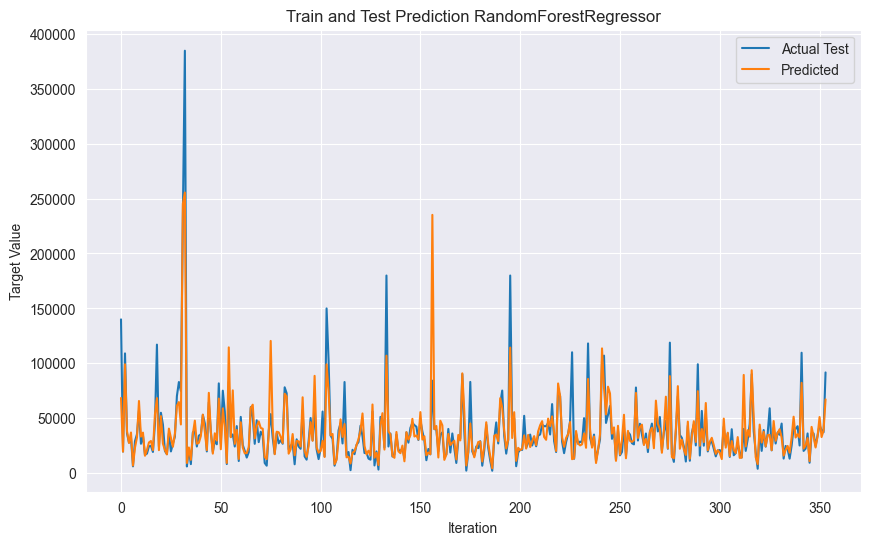

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction RandomForestRegressor')
plt.legend()
plt.savefig('RandomForestRegressor small.png')
plt.show()

### XGBRegressor

In [13]:
XGB=XGBRegressor()
XGB.fit(X_train,Y_train)
pred=XGB.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))

# Cross Validation on XGB Model
scores = cross_val_score(XGB, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('XGBRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 66.93009097245364
mean_squared_error: 360322874.40673804
mean_absolute_error: 7870.618489928164
root_mean_squared_error: 18982.1725418019

Cross validation score : 68.5530580080574

R2_Score - Cross Validation Score : -1.6229670356037644


##### Đồ thị so khớp của mô hình

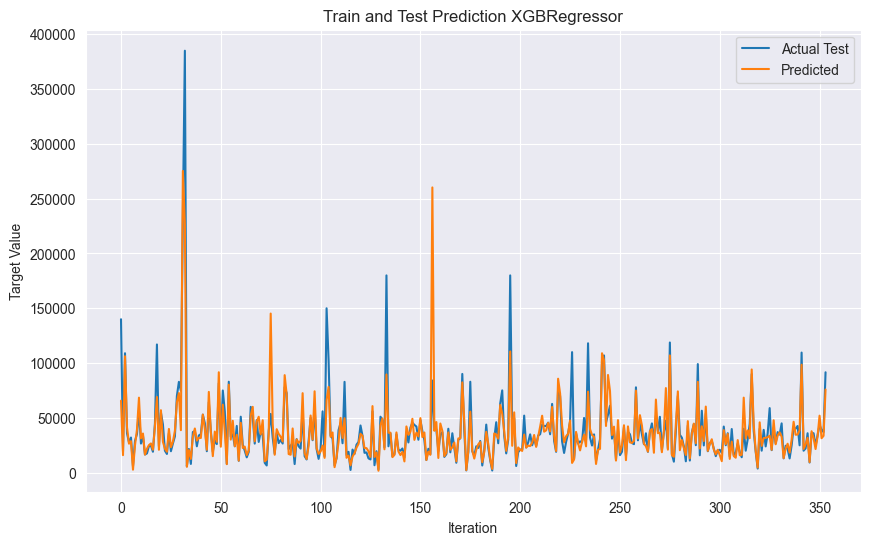

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction XGBRegressor')
plt.legend()
plt.savefig('XGBRegressor small.png')
plt.show()

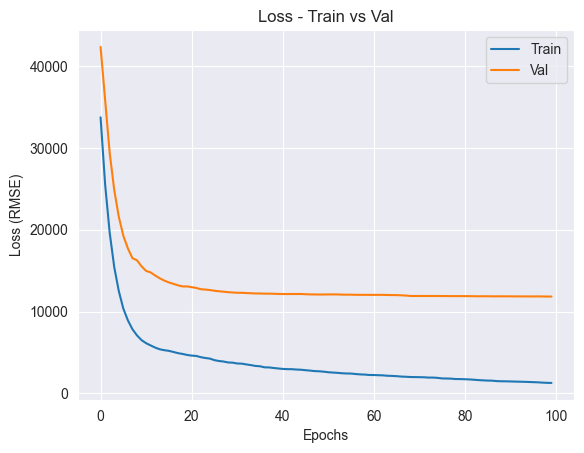

In [15]:
import matplotlib.pyplot as plt

_, X_val, _, Y_val = train_test_split(X, Y, test_size=0.2, random_state=10)
# Huấn luyện mô hình XGBRegressor
XGB = XGBRegressor()
XGB.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_val, Y_val)], eval_metric='rmse', verbose=False)

# Thu thập thông tin loss từ quá trình huấn luyện
train_loss = XGB.evals_result()['validation_0']['rmse']
test_loss = XGB.evals_result()['validation_1']['rmse']

# Vẽ đồ thị loss
plt.plot(train_loss, label='Train')
plt.plot(test_loss, label='Val')
plt.xlabel('Epochs')
plt.ylabel('Loss (RMSE)')
plt.title('Loss - Train vs Val')
plt.legend()
plt.savefig('loss_plot_small.png')
plt.show()

### GradientBoostingRegressor

In [16]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,Y_train)
pred=GBR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))

# Cross Validation on Gradient Boosting
scores = cross_val_score(GBR, X, Y, cv = 10).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('GradientBoostingRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 71.25323143034203
mean_squared_error: 313218832.0293351
mean_absolute_error: 7954.133975326146
root_mean_squared_error: 17697.98949116354

Cross validation score : 77.85596545162122

R2_Score - Cross Validation Score : -6.60273402127919


##### Đồ thị so khớp của mô hình

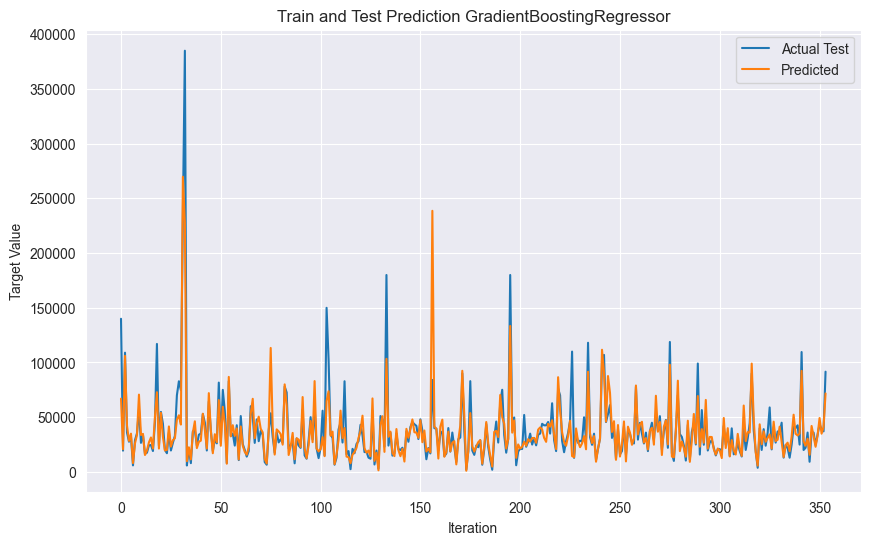

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction GradientBoostingRegressor')
plt.legend()
plt.savefig('GradientBoostingRegressor small.png')
plt.show()

##### Đồ thị so khớp của mô hình

### DecisionTreeRegressor

In [18]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,Y_train)
pred=DTR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))
# Cross Validation Score
scores = cross_val_score(DTR, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('DecisionTreeRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 68.32205011891274
mean_squared_error: 345156376.05649716
mean_absolute_error: 9581.384180790961
root_mean_squared_error: 18578.384646047598

Cross validation score : 53.06403433699223

R2_Score - Cross Validation Score : 15.258015781920513


##### Đồ thị so khớp của mô hình

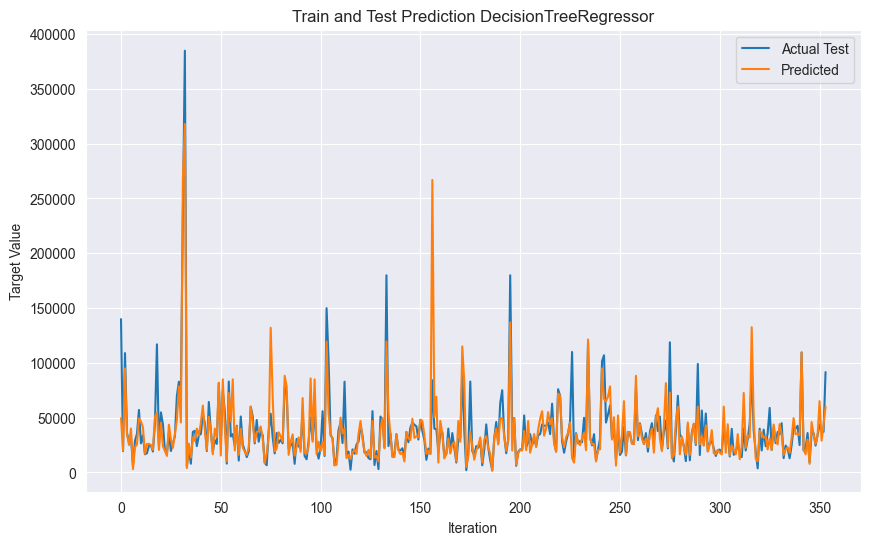

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction DecisionTreeRegressor')
plt.legend()
plt.savefig('DecisionTreeRegressor small.png')
plt.show()

### BaggingRegressor

In [20]:
BR=BaggingRegressor()
BR.fit(X_train,Y_train)
pred=BR.predict(X_test)
R2_score = r2_score(Y_test,pred)*100
print('R2_score:',R2_score)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print('root_mean_squared_error:',np.sqrt(mean_squared_error(Y_test,pred)))

# Cross Validation Score
scores = cross_val_score(BR, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

# Difference between Accuracy and CV Score
diff = R2_score - scores
print("\nR2_Score - Cross Validation Score :", diff)

write_result('BaggingRegressor',R2_score,scores,mean_squared_error(Y_test,pred),mean_absolute_error(Y_test,pred),np.sqrt(mean_squared_error(Y_test,pred)),diff)

R2_score: 74.15979016101038
mean_squared_error: 281549570.5386533
mean_absolute_error: 8081.6540866290015
root_mean_squared_error: 16779.438922045436

Cross validation score : 68.68583062489986

R2_Score - Cross Validation Score : 5.473959536110513


##### Đồ thị so khớp của mô hình

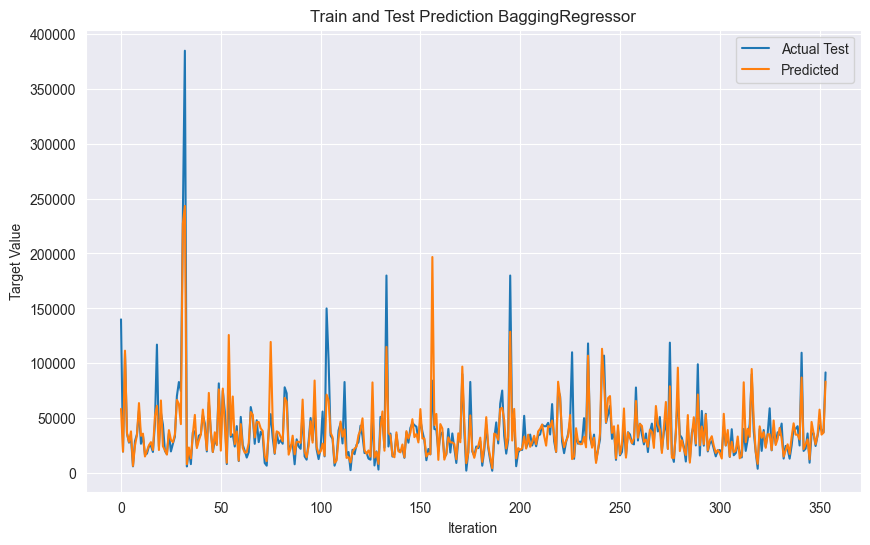

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(Y_test)), Y_test, label='Actual Test')
plt.plot(range(len(pred)), pred, label='Predicted')
plt.xlabel('Iteration')
plt.ylabel('Target Value')
plt.title('Train and Test Prediction BaggingRegressor')
plt.legend()
plt.savefig('BaggingRegressor small.png')
plt.show()

### Đánh giá các mô hình hoạt động trên Dataset
###### Từ hình ảnh so khớp nhận dạng và thực tế :
![pred](combined_image_small.png)
###### Ta có thể nhận thấy rằng ở tập dữ liệu Small thì giá được đoán có độ chính xác ở mức khá, không cao và tốt như ở tập Big. Nhìn kĩ thì ta sẽ thấy được giá được dự đoán lệch rất nhiều, ví dụ như giá cao thì dự đoán thành thấp và ngược lại. **Đây là khuyết điểm của tập dữ liệu nhỏ khi huấn luyện mô hình**

### Quyết định mô hình
###### Từ bảng kết quả R2_Score và RMSE của 4 file data khác nhau :
![R2_Score](r2_score_comparison_smallDS.png)
![RMSE](RMSE_comparison_smallDS.png)

###### Ta cũng có đồ thị Loss Train_Val của mô hình **XGBRegressor** .
![Loss](loss_plot_small.png)

###### Từ các ảnh trên,ta có thể thấy rằng độ chính xác theo **R2_Score** và chấm điểm theo **RMSE** thì ở các mô hình có sự biến thiên rất không đồng đều. Thêm vào đó, ở đồ thị Loss, ta có thể mô hình cho kết quả không đáng tin cậy. Điều này dẫn đến khó trong việc lựa chon mô hình tốt nhất để HyperParamater Tunning.



In [22]:
from sklearn.model_selection import GridSearchCV

In [35]:
parameters = {
    'n_estimators': [100, 200, 300],           # Số lượng cây
    'max_depth': [None, 5, 10],                 # Độ sâu tối đa của cây
    'min_samples_split': [2, 5, 10],            # Số lượng mẫu tối thiểu để phân chia một nút trong cây
    'min_samples_leaf': [1, 2, 4],              # Số lượng mẫu tối thiểu trong mỗi lá của cây
    'max_features': ['auto', 'sqrt', 'log2'],   # Số lượng đặc trưng được xem xét khi tìm kiếm phân chia tốt nhất
}

In [52]:
rf = RandomForestRegressor()

# Tinh chỉnh siêu tham số với RandomizedSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=parameters,
                                   scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [53]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [54]:
Final_mod_forest=RandomForestRegressor(max_depth=None, max_features='log2',
                                min_samples_split=2,min_samples_leaf=1,n_estimators=100)
Final_mod_forest.fit(X_train,Y_train)
pred=Final_mod_forest.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(Y_test, pred)))

R2_Score: 75.08580190720728
mean_squared_error: 271459938.4853526
mean_absolute_error: 7757.870722267061
RMSE value: 16476.041347524973


In [26]:
import joblib
joblib.dump(Final_mod_forest,"Car_Price_small.pkl")

['Car_Price_small.pkl']

In [27]:
# Loading the saved model
model=joblib.load("Car_Price_small.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([ 75479.55515016,  21157.87473968, 124787.66856481,  41077.37572346,
        25968.22269779,  35264.22540136,  12083.36928885,  25769.36752952,
        31487.48856691,  66917.71073424,  31181.83767907,  34170.71350069,
        19191.035109  ,  20268.19596737,  29189.9846028 ,  30705.78128428,
        20710.81690659,  48778.9279644 ,  66359.85621654,  20710.81690659,
        53358.19466385,  33643.11662578,  20408.63264939,  22362.77934607,
        41220.18992443,  31373.11925715,  28005.50822662,  34210.55858023,
        47013.79691209,  62265.89898103,  42139.85005292, 208561.13966667,
       188113.56333333,  10521.96067367,  22462.0052953 ,  12762.01461939,
        33389.77201865,  65921.92680324,  23297.74139881,  28613.38484453,
        29992.94309252,  52282.05686266,  36733.19694433,  20710.81690659,
        72054.45218253,  35650.60168808,  17241.64755387,  34546.95544099,
        29205.69509484,  67537.7015391 ,  24878.66264993,  61837.99430431,
        42188.10950659,  

In [28]:
pd.DataFrame([model.predict(X_test)[:],Y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,344,345,346,347,348,349,350,351,352,353
Predicted,75479.55515,21157.87474,124787.668565,41077.375723,25968.222698,35264.225401,12083.369289,25769.36753,31487.488567,66917.710734,...,31491.896471,13231.577877,38173.214486,33457.645045,23466.333295,32074.849066,46482.767452,34065.344522,38122.60676,64842.54326
Actual,139900.00000,19350.00000,108889.000000,35980.000000,27490.000000,31990.000000,5890.000000,28870.00000,35180.000000,56970.000000,...,35890.000000,9190.000000,35990.000000,35888.000000,24430.000000,33990.000000,43500.000000,38890.000000,36990.00000,91520.00000


In [29]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.05, 0.01],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3]
}

In [30]:
GBR = GradientBoostingRegressor()

# Tinh chỉnh siêu tham số với RandomizedSearchCV
random_search = GridSearchCV(estimator=GBR, param_grid=param_grid,
                                   scoring='neg_mean_squared_error', cv=5)
random_search.fit(X_train, Y_train)

# In ra kết quả tốt nhất
print("Best parameters:", random_search.best_params_)
print("Best score:", np.sqrt(-random_search.best_score_))

Best parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 300}
Best score: 12088.62856154586


In [31]:
Final_mod_GBR=GradientBoostingRegressor(learning_rate=0.1, max_depth=3,min_samples_split=2,                                                     min_samples_leaf=1,n_estimators=300)
Final_mod_GBR.fit(X_train,Y_train)
pred=Final_mod_GBR.predict(X_test)
print('R2_Score:',r2_score(Y_test,pred)*100)
print('mean_squared_error:',mean_squared_error(Y_test,pred))
print('mean_absolute_error:',mean_absolute_error(Y_test,pred))
print("RMSE value:",np.sqrt(mean_squared_error(Y_test, pred)))

scores = cross_val_score(Final_mod_GBR, X, Y, cv = 5).mean()*100
print("\nCross validation score :", scores)

R2_Score: 73.48835148252115
mean_squared_error: 288865427.21124274
mean_absolute_error: 7775.141811416959
RMSE value: 16996.04151593078

Cross validation score : 72.49214240039666


In [32]:
import joblib
joblib.dump(Final_mod_GBR,"Car_Price_small_GBR.pkl")

['Car_Price_small_GBR.pkl']

In [33]:
# Loading the saved model
model=joblib.load("Car_Price_small_GBR.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

array([ 89999.34177008,  18750.42336042, 100203.06738446,  41623.13075649,
        27186.55903811,  34650.8573395 ,   6780.80439368,  24906.55764395,
        36726.89079393,  75871.2888711 ,  33428.07254406,  34210.26365697,
        14272.04739087,  19802.8311131 ,  27580.33605601,  29609.89980554,
        21186.81924951,  45587.50681495,  77790.82529771,  21186.81924951,
        60055.99522421,  34139.27579511,  19569.04247894,  19487.74487758,
        40600.97933523,  19289.46168893,  29501.34630767,  34045.5725262 ,
        47166.90696429,  45816.70520641,  40217.42899321, 276832.65915616,
       231434.12814485,   4227.50562398,  22187.46211883,  12775.55887938,
        34063.43960243,  46513.24722614,  25802.12970489,  29438.7742878 ,
        28287.53876509,  51825.10043708,  38002.66034407,  21186.81924951,
        73733.03492271,  37534.82122842,  17345.48318456,  34385.70975231,
        27436.96492682,  78946.3369176 ,  23143.83285651,  55704.23258316,
        39791.04889378,  

In [34]:
pd.DataFrame([model.predict(X_test)[:],Y_test[:]],index=["Predicted","Actual"])

,0,1,2,3,4,5,6,7,8,9,...,344,345,346,347,348,349,350,351,352,353
Predicted,89999.34177,18750.42336,100203.067384,41623.130756,27186.559038,34650.85734,6780.804394,24906.557644,36726.890794,75871.288871,...,30405.205833,15497.189081,37222.47567,32732.70956,21596.29048,32887.929456,48963.442592,33438.661158,35513.524061,74566.443489
Actual,139900.00000,19350.00000,108889.000000,35980.000000,27490.000000,31990.00000,5890.000000,28870.000000,35180.000000,56970.000000,...,35890.000000,9190.000000,35990.00000,35888.00000,24430.00000,33990.000000,43500.000000,38890.000000,36990.000000,91520.000000
